In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
import pickle
import gzip
import numpy as np

def load_data():
    """Return the MNIST data as a tuple containing the training data,
    the validation data, and the test data.
    The ``training_data`` is returned as a tuple with two entries.
    The first entry contains the actual training images.  This is a
    numpy ndarray with 50,000 entries.  Each entry is, in turn, a
    numpy ndarray with 784 values, representing the 28 * 28 = 784
    pixels in a single MNIST image.
    The second entry in the ``training_data`` tuple is a numpy ndarray
    containing 50,000 entries.  Those entries are just the digit
    values (0...9) for the corresponding images contained in the first
    entry of the tuple.
    The ``validation_data`` and ``test_data`` are similar, except
    each contains only 10,000 images.
    This is a nice data format, but for use in neural networks it's
    helpful to modify the format of the ``training_data`` a little.
    That's done in the wrapper function ``load_data_wrapper()``, see
    below.
    """
    f = gzip.open('mnist.pkl.gz', 'rb')
    training_data, validation_data, test_data = pickle.load(f, encoding="latin1")
    f.close()
    return (training_data, validation_data, test_data)

def load_data_wrapper():
    tr_d, va_d, te_d = load_data()
    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results = [vectorized_result(y) for y in tr_d[1]]
    training_data = zip(training_inputs, training_results)
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data = zip(validation_inputs, va_d[1])
    test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_data = zip(test_inputs, te_d[1])
    return (training_data, validation_data, test_data)

def vectorized_result(j):
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

In [6]:
training_data, validation_data, test_data = load_data_wrapper()
print(type(training_data), type(validation_data), type(test_data))
training_data = list(training_data)
test_data = list(test_data) 
validation_data = list(validation_data)

print(len(training_data), len(training_data[0]), len(training_data[0][0]))
# number of samples (Y in one hot encoding, X)

<class 'zip'> <class 'zip'> <class 'zip'>
50000 2 784


tempTrainY[10] = [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
trainX.shape = (50000, 784, 1)
valX.shape = (10000, 784, 1)


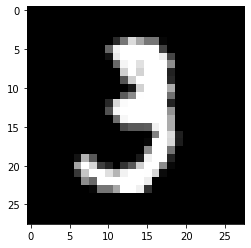

In [7]:
testX = []
testY = []
valX = []
valY = []
trainX = []
tempTrainY = []

for sample in training_data:
    X = sample[0]
    Y = sample[1]
    trainX.append(X)
    tempTrainY.append(Y)

for sample in test_data:
    X = sample[0]
    Y = sample[1]
    testX.append(X)
    testY.append(Y)

for sample in validation_data:
    X = sample[0]
    Y = sample[1]
    valX.append(X)
    valY.append(Y)

trainX = np.array(trainX)
testX = np.array(testX)
valX = np.array(valX)
tempTrainY = np.array(tempTrainY)
testY = np.array(testY)
valY = np.array(valY)

ind = 10

plt.imshow(np.reshape(trainX[ind], (28, 28)), cmap='gray')
print(f"tempTrainY[{ind}] = {tempTrainY[ind].T}")

# valX = np.reshape(valX, (valX.shape[0], valX.shape[1]))
print(f"trainX.shape = {trainX.shape}")
print(f"valX.shape = {valX.shape}")

In [8]:
trainY = []
for sampleY in tempTrainY:
    for i in range(10):
        if sampleY[i] == 1:
           trainY.append(i)
           break

print(f"trainX.shape = {trainX.shape}")
print(f"valX.shape = {valX.shape}")

trainX = np.concatenate((trainX, valX), axis=0)

print(f"trainX.shape = {trainX.shape}")
print(f"testX.shape = {testX.shape}")

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1]))

print(f"trainX.shape = {trainX.shape}")
print(f"testX.shape = {testX.shape}")

trainX = np.reshape(trainX, (60000, 28, 28))
testX = np.reshape(testX, (10000, 28, 28))

print(f"Reshaped trainX.shape = {trainX.shape}")
print(f"Reshaped testX.shape = {testX.shape}")


trainX.shape = (50000, 784, 1)
valX.shape = (10000, 784, 1)
trainX.shape = (60000, 784, 1)
testX.shape = (10000, 784, 1)
trainX.shape = (60000, 784)
testX.shape = (10000, 784)
Reshaped trainX.shape = (60000, 28, 28)
Reshaped testX.shape = (10000, 28, 28)


ind = 10


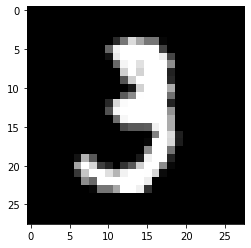

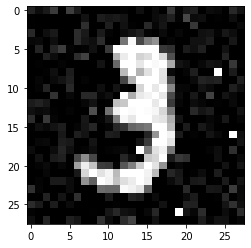

In [9]:
from random import random as rf
from random import randint as ri

def add_normal_noise(data):
    ret_data = data + np.random.normal(0, 0.1, size=data.shape)
    return np.clip(ret_data, 0.0, 1.0)

def add_salt_and_pepper_noise(data):
    arr = [0]*98
    arr.append(-1)
    arr.append(1)
    ret_data = data + np.random.choice(arr, size=data.shape)
    return np.clip(ret_data, 0.0, 1.0)

trainX_noisy = add_salt_and_pepper_noise(add_normal_noise(trainX))
testX_noisy = add_salt_and_pepper_noise(add_normal_noise(testX))

print(f"ind = {ind}")
plt.imshow(trainX[ind], cmap='gray')
plt.show()
plt.imshow(trainX_noisy[ind], cmap='gray')
plt.show()


In [10]:

def get_model():
    layers_list = [
      layers.Input(shape=(28, 28, 1)),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')
      ]

    model = tf.keras.Sequential(layers_list)

    model.summary()

    model.compile(optimizer=tf.keras.optimizers.Adam(),
                loss='mse',
                metrics=['mse'])
    
    print("Testing model before training")
    model.evaluate(testX, testX)
    return model

def get_fully_conn_model(mdl = [2000, 500, 10]):
    layers_list = [
      layers.Input(shape=(28, 28, 1)),
      layers.Flatten(),
      layers.Dense(mdl[0], activation='relu'),
      layers.Dense(mdl[1], activation='relu'),
      layers.Dense(mdl[2], activation='relu'),
      layers.Dense(mdl[1], activation='relu'),
      layers.Dense(mdl[0], activation='relu'),
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28), input_shape=(784,))
      ]

    model = tf.keras.Sequential(layers_list)

    # model.summary()

    model.compile(optimizer=tf.keras.optimizers.Adam(),
                loss='mse',
                metrics=['mse'])
    
    print("Testing model before training")
    model.evaluate(testX, testX)
    return model


def train_model(model):
    # print(f"Training model: {model}")
    BATCH_SIZE = 500

    history = model.fit(
        x=trainX_noisy,
        y=trainX,
        batch_size=BATCH_SIZE,
        epochs=20,
        verbose=0)
    return model, history
    
def evaluate_model(model, history):
    # print(f"Evaluating model: {model}")
    loss_arr = history.history["loss"]

    # plt.title("Loss")
    # plt.plot(loss_arr, 'o-')
    # plt.ylabel("Loss value")
    # plt.xlabel("epoch")
    # plt.show()

    print(f"\nTraining evaluation: ")
    resTr = model.evaluate(trainX_noisy, trainX)
    print(f"Testing evaluation: ")
    resTs = model.evaluate(testX_noisy, testX)

    print("="*110)
    return resTr, resTs



In [11]:


def run_fully_conn_exp(hiddns = [[1500, 500, 10], [2000, 500, 10], [3000, 500, 10], [4000, 700, 10]]):
    trs, tss = [], []
    accTr, accTs = [], []
    for hid in hiddns:
        print(f"\n\nModel hidden layers = {hid}")
        model = get_fully_conn_model(hid)
        model, history = train_model(model)
        resTr, resTs = evaluate_model(model, history)
        predTrain = model.predict(trainX)
        predTest = model.predict(testX)
        print(f"predTrain.shape = {predTrain.shape}, predTest.shape = {predTest.shape}")
        predTrain = np.reshape(predTrain, (60000, 28, 28))
        predTest = np.reshape(predTest, (10000, 28, 28))
        print(f"predTrain.shape = {predTrain.shape}, predTest.shape = {predTest.shape}")
        trs.append(predTrain)
        tss.append(predTest)
        accTr.append(resTr)
        accTs.append(resTs)
    plt.figure(figsize=(10, 4))
    plt.plot(accTr, 'o-', label = "Training loss", c='r')
    plt.plot(accTs, 'o-', label = "Testing loss", c='g')
    plt.legend(loc='best')
    plt.xticks(np.arange(len(hiddns)), hiddns)
    plt.show()
    return trs, tss, hiddns, accTs, accTr

def run_cnn():
    print(f"\n\n========== CNN autoencoder model ==========")
    model = get_model()
    model, history = train_model(model)
    resTr, resTs = evaluate_model(model, history)
    print(f"(CNN) Training loss: {resTr}. Test loss: {resTs}")
    predTrain = model.predict(trainX)
    predTest = model.predict(testX)
    print(f"predTrain.shape = {predTrain.shape}, predTest.shape = {predTest.shape}")
    predTrain = np.reshape(predTrain, (60000, 28, 28))
    predTest = np.reshape(predTest, (10000, 28, 28))
    print(f"predTrain.shape = {predTrain.shape}, predTest.shape = {predTest.shape}")
    return predTrain, predTest


In [12]:
prtr, prts = run_cnn()





========== CNN autoencoder model ==========
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 8)        584       
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 16)       1168      
 ranspose)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 1)         145       
                                                                 
Total para


========== Model = CNN autoencoder ==========



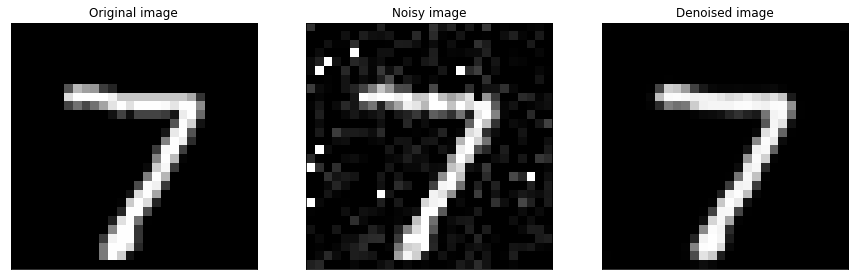

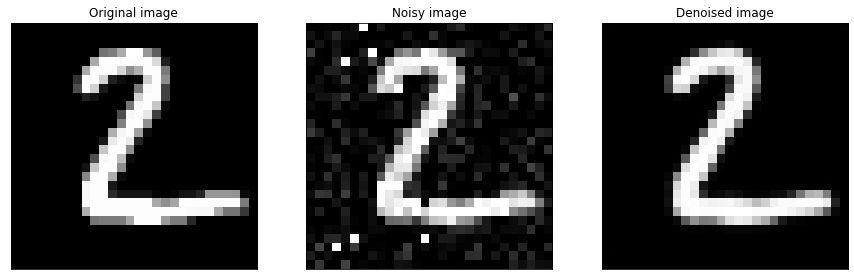

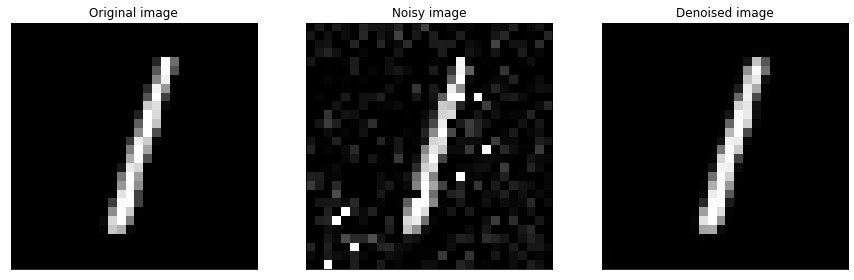

In [13]:
def show_examples(predTest_, hid):
    print(f"\n========== Model = {hid} ==========\n")
    for i in range(0, 3):
        fig, ax = plt.subplots(1, 3, figsize=(15, 45))
        ax[0].imshow(testX[i], cmap='gray')
        ax[0].set_title("Original image")
        ax[1].imshow(testX_noisy[i], cmap='gray')
        ax[1].set_title("Noisy image")
        ax[2].imshow(predTest_[i], cmap='gray')
        ax[2].set_title("Denoised image")
        ax[0].get_xaxis().set_visible(False)
        ax[0].get_yaxis().set_visible(False)
        ax[1].get_xaxis().set_visible(False)
        ax[1].get_yaxis().set_visible(False)
        ax[2].get_xaxis().set_visible(False)
        ax[2].get_yaxis().set_visible(False)
        plt.show()

show_examples(prts, "CNN autoencoder")



Model hidden layers = [1500, 500, 10]
Testing model before training
313/313 [==============================] - 1s 2ms/step - loss: 0.2311 - mse: 0.2311

Training evaluation: 
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0128 - mse: 0.0128
Testing evaluation: 
313/313 [==============================] - 1s 2ms/step
predTrain.shape = (60000, 28, 28), predTest.shape = (10000, 28, 28)
predTrain.shape = (60000, 28, 28), predTest.shape = (10000, 28, 28)


Model hidden layers = [2000, 500, 10]
Testing model before training
313/313 [==============================] - 1s 2ms/step - loss: 0.2311 - mse: 0.2311

Training evaluation: 
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0175 - mse: 0.0175
Testing evaluation: 
313/313 [==============================] - 1s 2ms/step
predTrain.shape = (60000, 28, 28), predTest.shape = (10000, 28, 28)
predTrain.shape = (60000, 28, 28), predTest.shape = (10000, 28, 28)


Model hidden layers = [3000, 500, 10]
Testing mo

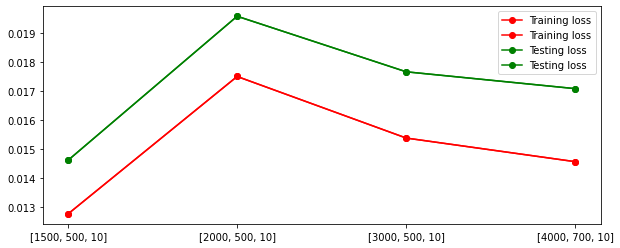

Models = [[1500, 500, 10], [2000, 500, 10], [3000, 500, 10], [4000, 700, 10]]. Loss test = [[0.014625188894569874, 0.014625188894569874], [0.01959141157567501, 0.019591405987739563], [0.01767549477517605, 0.017675485461950302], [0.01709451898932457, 0.01709451526403427]]. Best index = 0. Best Model = [1500, 500, 10]
Best model out of above = [1500, 500, 10]


Model hidden layers = [1500, 500, 500]
Testing model before training
313/313 [==============================] - 1s 3ms/step - loss: 0.2313 - mse: 0.2313

Training evaluation: 
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0044 - mse: 0.0044
Testing evaluation: 
313/313 [==============================] - 1s 2ms/step
predTrain.shape = (60000, 28, 28), predTest.shape = (10000, 28, 28)
predTrain.shape = (60000, 28, 28), predTest.shape = (10000, 28, 28)


Model hidden layers = [1500, 500, 200]
Testing model before training
313/313 [==============================] - 1s 2ms/step - loss: 0.2311 - mse: 0.2311

Training

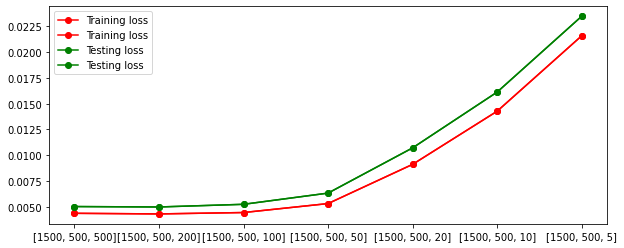

In [14]:

trs, tss, hdns, lossTs, lossTr = run_fully_conn_exp()
bstInd = np.argmin([i[0] for i in lossTs])
bstMdl = hdns[bstInd]
print(f"Models = {hdns}. Loss test = {lossTs}. Best index = {bstInd}. Best Model = {bstMdl}")

print(f"Best model out of above = {bstMdl}")
a, b, c = bstMdl
h1 = [[a, b, i] for i in (500, 200, 100, 50, 20, 10, 5)]
# h1 = [[a, b, i] for i in (200)]
trs2, tss2, hdns2, lossTs2, lossTr2 = run_fully_conn_exp(h1)



========== Model = [1500, 500, 10] ==========



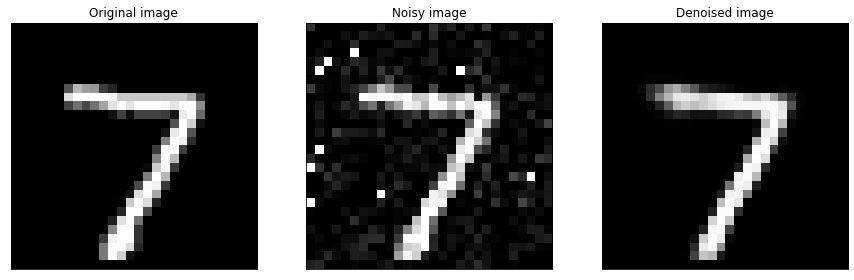

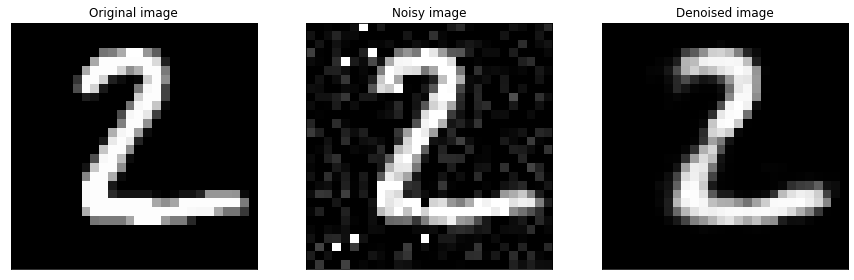

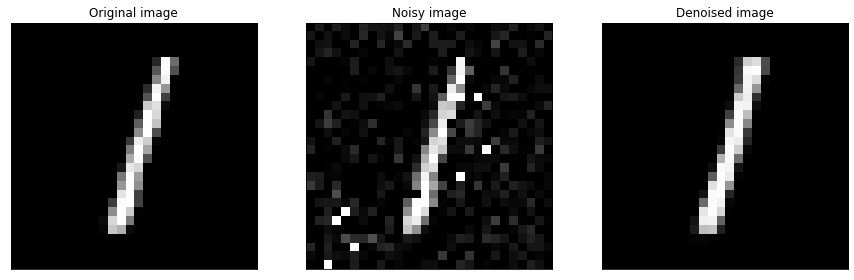


========== Model = [2000, 500, 10] ==========



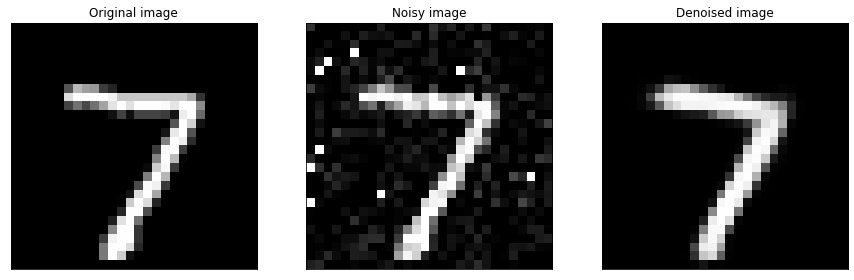

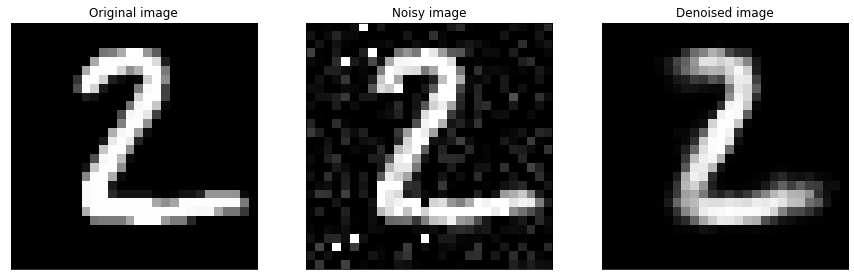

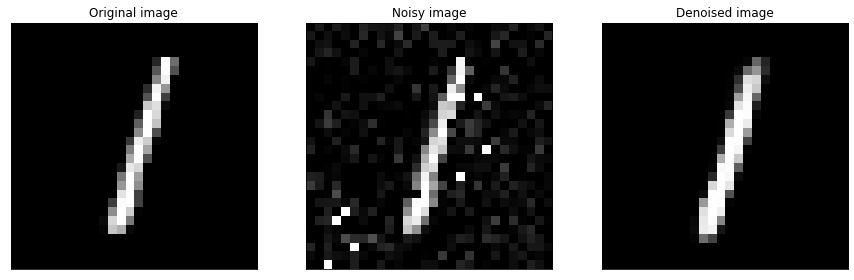


========== Model = [3000, 500, 10] ==========



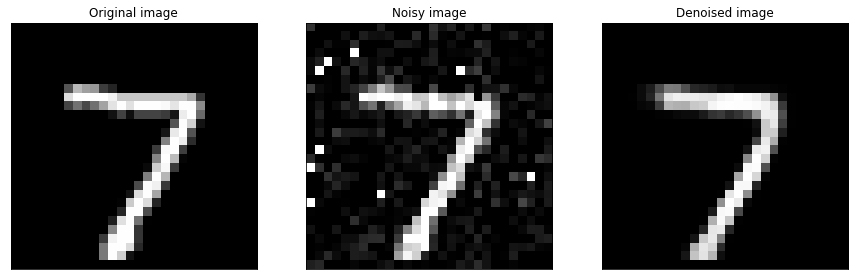

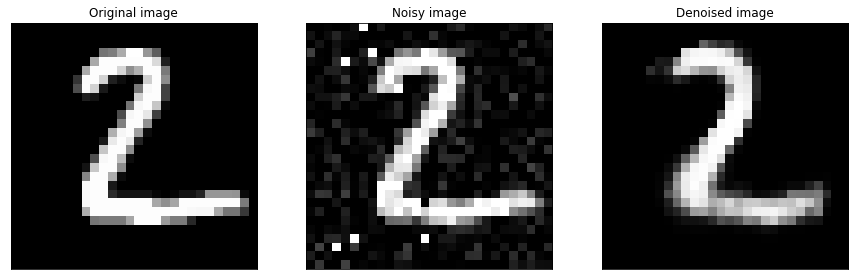

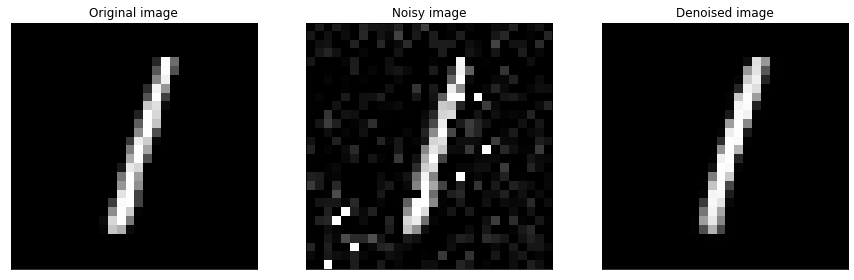


========== Model = [4000, 700, 10] ==========



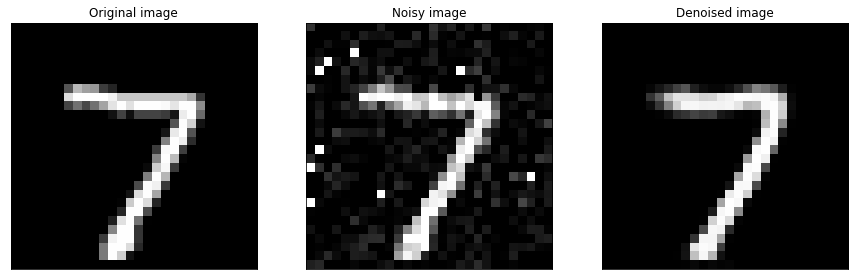

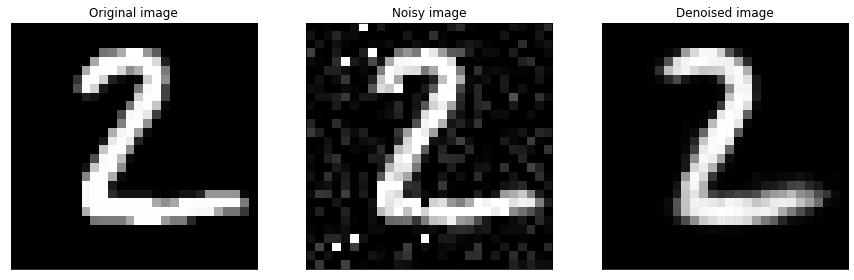

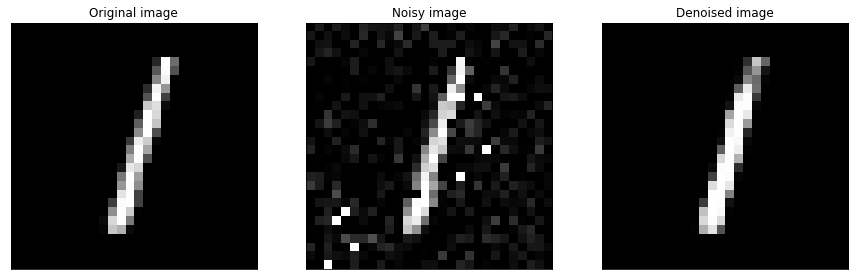


========== Model = [1500, 500, 500] ==========



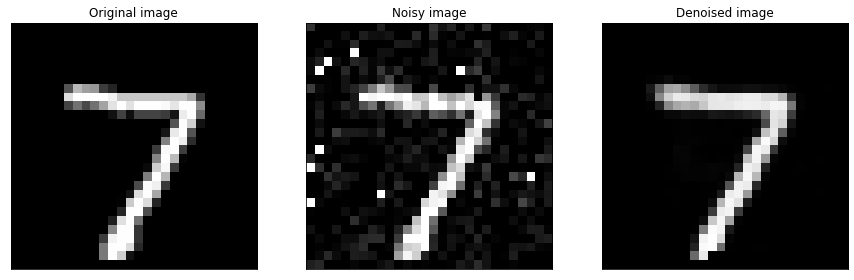

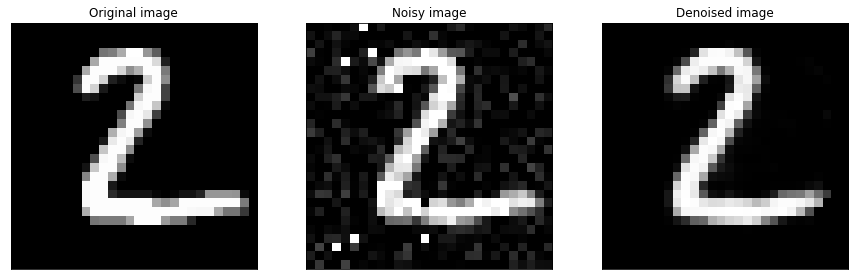

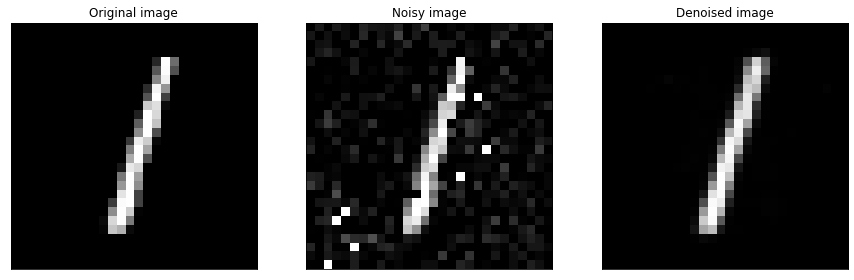


========== Model = [1500, 500, 200] ==========



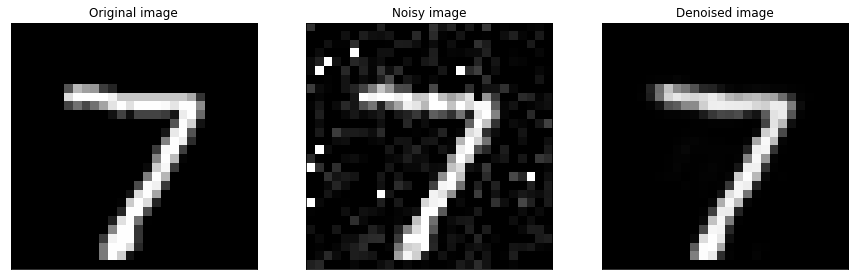

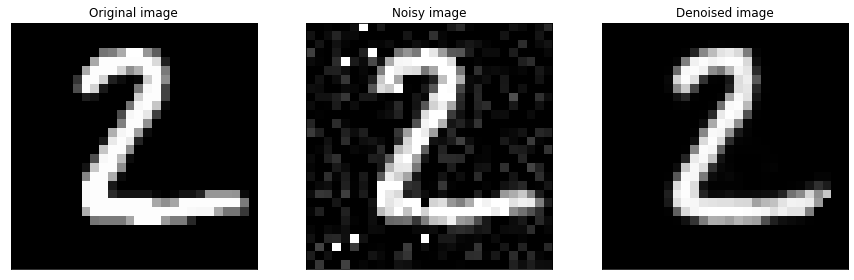

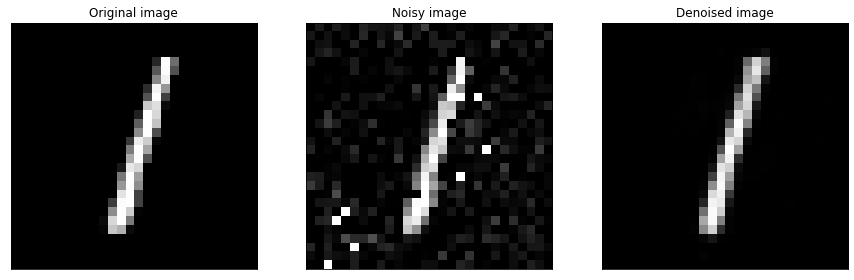


========== Model = [1500, 500, 100] ==========



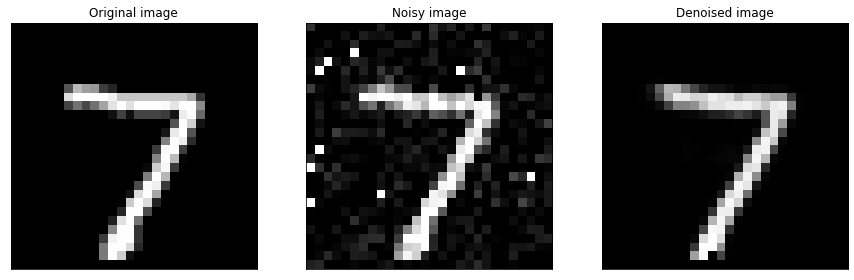

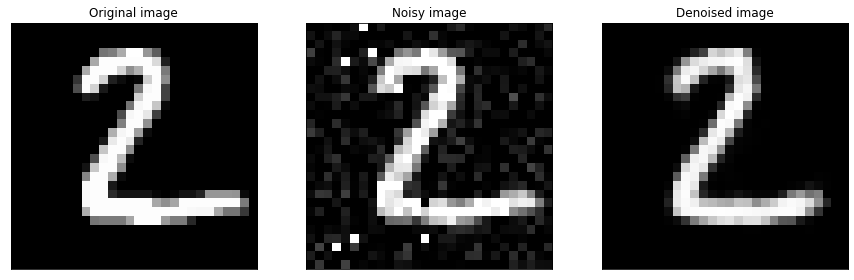

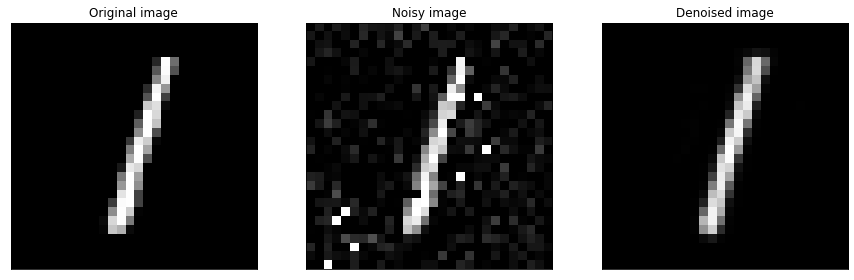


========== Model = [1500, 500, 50] ==========



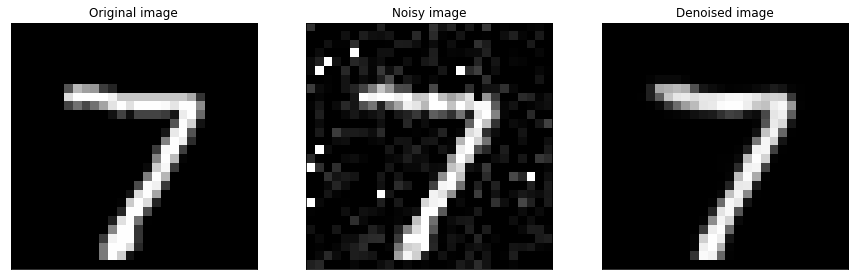

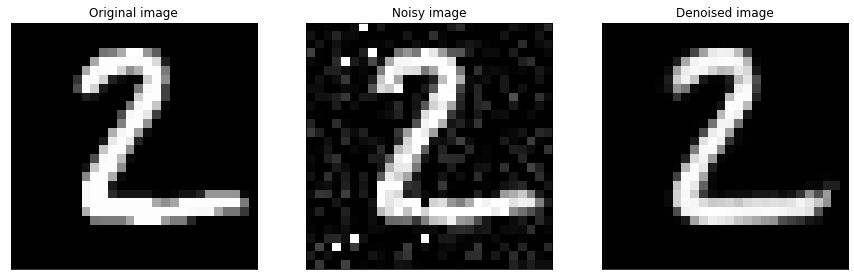

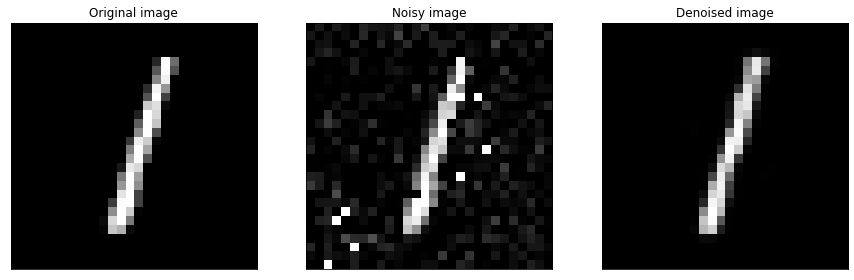


========== Model = [1500, 500, 20] ==========



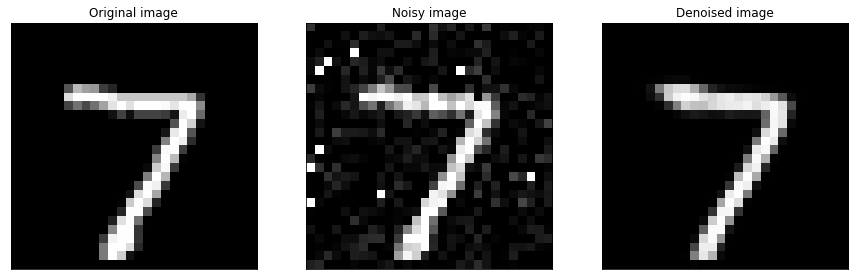

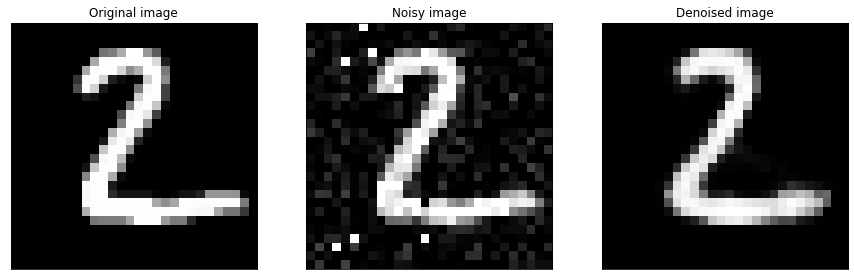

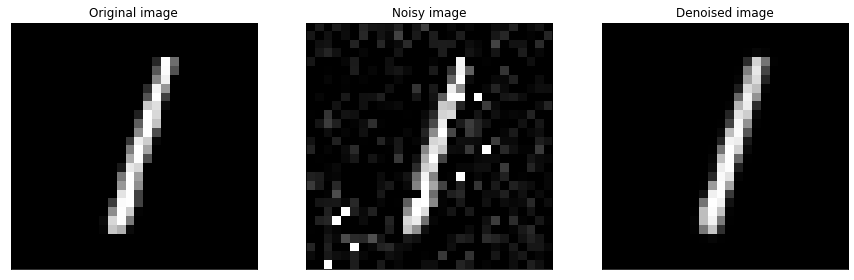


========== Model = [1500, 500, 10] ==========



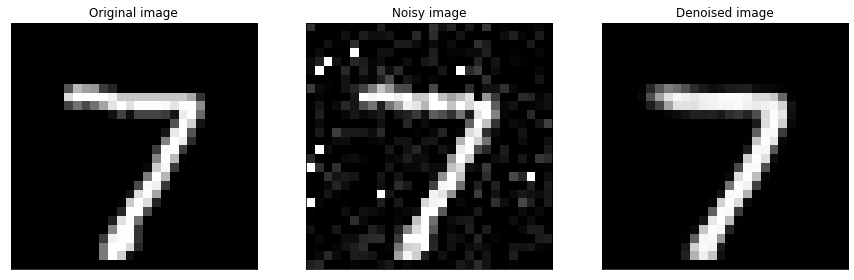

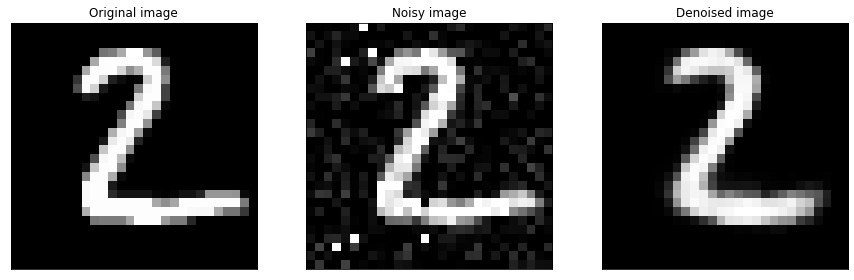

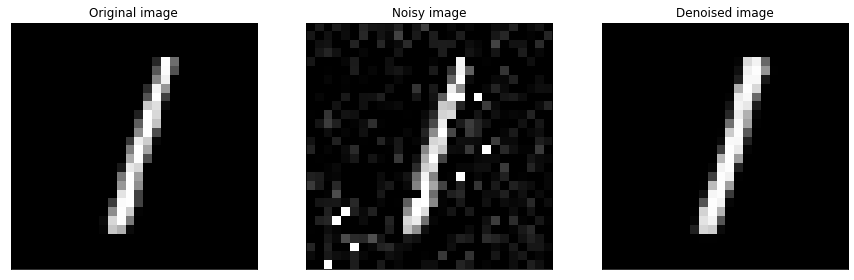


========== Model = [1500, 500, 5] ==========



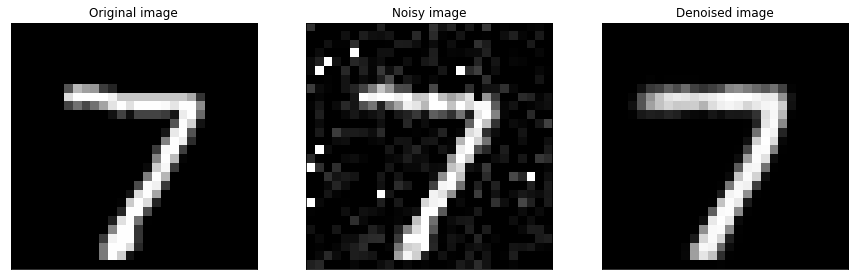

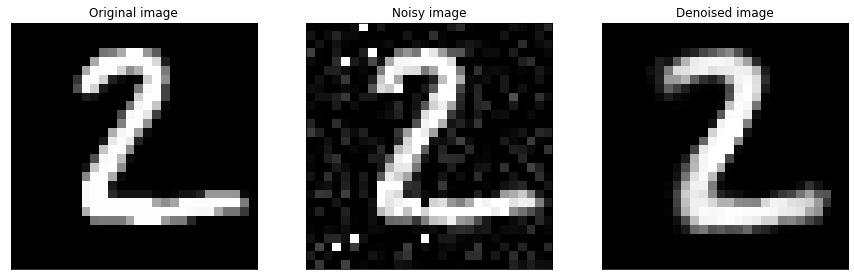

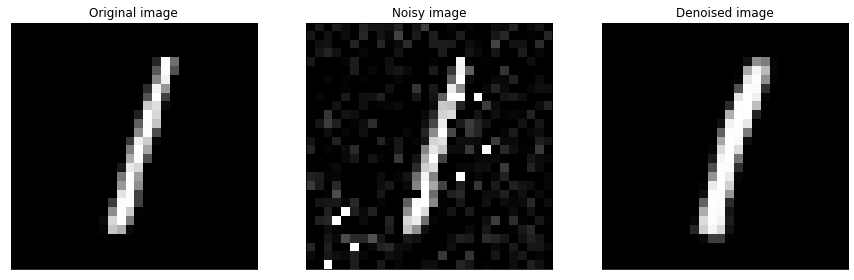

In [15]:

for i in range(len(tss)):
    show_examples(tss[i], hdns[i])

for i in range(len(tss2)):
    show_examples(tss2[i], hdns2[i])

